In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Phase 1

In [ ]:
# This Part Added to code locally
from pathlib import Path
BASE_DIR = Path("../")
RAW_DATA_DIR = BASE_DIR / "data" / "raw"
PROCESSED_DATA_DIR = BASE_DIR / "data" / "processed"
CUSTOMERS_CSV = RAW_DATA_DIR / "customers.csv"
PRODUCTS_CSV = RAW_DATA_DIR / "products.csv"
SALES_CSV = RAW_DATA_DIR / "sales_transactions.csv"
REPORTS_BASE = BASE_DIR / "reports/figures"

In [ ]:
# # This Part Added to code with colab
# from google.colab import files
# uploaded = files.upload()
# RAW_DATA_DIR = Path("./")
# PROCESSED_DATA_DIR = Path("./")
# REPORTS_BASE = Path("./")

Saving customers.csv to customers (1).csv
Saving products.csv to products (1).csv
Saving sales_transactions.csv to sales_transactions (1).csv


In [14]:
class Repository:
    def __init__(self, raw_data_dir, processed_data_dir):
        self.raw_data_dir = raw_data_dir
        self.processed_data_dir = processed_data_dir

    def load_customers(self):
        return pd.read_csv(self.raw_data_dir / "customers.csv")

    def load_products(self):
        return pd.read_csv(self.raw_data_dir / "products.csv")

    def load_sales(self):
        return pd.read_csv(self.raw_data_dir / "sales_transactions.csv")

    def save_customers(self, df):
        df.to_csv(self.processed_data_dir / "cleaned_customers.csv", index=False)

    def save_products(self, df):
        df.to_csv(self.processed_data_dir / "cleaned_products.csv", index=False)

    def save_sales(self, df):
        df.to_csv(self.processed_data_dir / "cleaned_sales_transactions.csv", index=False)

In [15]:
repo=Repository(RAW_DATA_DIR,PROCESSED_DATA_DIR)
customer=repo.load_customers()
product=repo.load_products()
transactions=repo.load_sales()

In [18]:
customer.head()

,CustomerID,Name,Region,Signup_Date
0,CUST-001,Customer_1,east,2020-01-05
1,CUST-002,Customer_2,East,2020-01-12
2,CUST-003,Customer_3,West,2020-01-19
3,CUST-004,Customer_4,midwest,2020-01-26
4,CUST-005,Customer_5,midwest,2020-02-02


In [19]:
customer.describe()

,CustomerID,Name,Region,Signup_Date
count,105,105,105,105
unique,100,100,10,100
top,CUST-011,Customer_11,South,2020-03-15
freq,2,2,23,2


In [20]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerID   105 non-null    object
 1   Name         105 non-null    object
 2   Region       105 non-null    object
 3   Signup_Date  105 non-null    object
dtypes: object(4)
memory usage: 3.4+ KB


In [21]:
# sign up date should be DateTime Not String
customer['Signup_Date']=pd.to_datetime(customer['Signup_Date'], errors='coerce')

In [22]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerID   105 non-null    object        
 1   Name         105 non-null    object        
 2   Region       105 non-null    object        
 3   Signup_Date  105 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 3.4+ KB


In [23]:
product.describe()

,Price
count,20.000000
mean,283.633000
std,121.485899
min,63.690000
25%,205.180000
50%,303.745000
75%,362.327500
max,464.980000


In [24]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ProductID  20 non-null     object 
 1   Category   20 non-null     object 
 2   Price      20 non-null     float64
dtypes: float64(1), object(2)
memory usage: 612.0+ bytes


In [25]:
transactions.describe()

,TransactionID,Quantity,Discount
count,1000.000000,1000.000000,1000.000000
mean,10500.500000,9.882000,0.085800
std,288.819436,70.281801,0.072998
min,10001.000000,-9.000000,0.000000
25%,10250.750000,3.000000,0.050000
50%,10500.500000,5.000000,0.050000
75%,10750.250000,7.000000,0.100000
max,11000.000000,1000.000000,0.200000


In [26]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TransactionID  1000 non-null   int64  
 1   CustomerID     1000 non-null   object 
 2   ProductID      1000 non-null   object 
 3   Date           995 non-null    object 
 4   Quantity       1000 non-null   int64  
 5   Discount       1000 non-null   float64
 6   Total_Amount   971 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


# Problems with Data (Transactions)
- (Incorrect Data Types )
    - Total amount is str
    - Transaction Date is str
- There are multible leading and trailing spaces
- missing values in Date and total amount
    - 5 in Dates
    - 29 in Total_Amount
- 42 Check_Receipt in Total_Amount
- 10 Invalid_Date exists
- Some Total_Amount got EUR and others doesn't
- Quantity values
    - Check for negative quantities (verify with df[df['Quantity'] < 0])
- there are outliers in the Quantity column

### Data Cleaning

In [27]:
# clean the product table (remove leading and trailing spaces)
product['Category'] = product['Category'].str.strip().str.title()

# clean the customer table (remove leading and trailing spaces)
customer['Region'] = customer['Region'].str.strip().str.title()
customer['Name'] = customer['Name'].str.strip().str.title()

# convert the Signup_Date into DateTime (done in a previous sell)
customer['Signup_Date'] = pd.to_datetime(customer['Signup_Date'], errors='coerce')

### handling missing values for Date ?

In [28]:
transactions['Quantity'].skew()
# since > 1, then it's skewed
# since there is outlier or skewness in the dataset we will fill the missing values with median not mean

np.float64(14.021126545817783)

In [29]:
# Converting the Date column in transactions to DateTime
transactions['Date']=pd.to_datetime(transactions['Date'], errors='coerce')

# Remove the EUR
transactions['Total_Amount'] = (
    transactions['Total_Amount']
    .astype(str)
    .str.replace('EUR', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
)

# Converting the Total_Amount column in transactions to Numeric
transactions['Total_Amount'] = pd.to_numeric(transactions['Total_Amount'], errors='coerce')


In [30]:
#Remove negative Quantity
transactions = transactions[transactions['Quantity'] >= 0]

In [31]:
# Drop rows where Date is NaT (including "Invalid_Date")
transactions = transactions.dropna(subset=['Date'])

In [32]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 970 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  970 non-null    int64         
 1   CustomerID     970 non-null    object        
 2   ProductID      970 non-null    object        
 3   Date           970 non-null    datetime64[ns]
 4   Quantity       970 non-null    int64         
 5   Discount       970 non-null    float64       
 6   Total_Amount   734 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 60.6+ KB


In [33]:
# Save Processed Data
repo.save_customers(customer)
repo.save_products(product)
repo.save_sales(transactions)

In [34]:
# Phase 2

In [35]:
# Merge sales with customers
sales_customers = transactions.merge(customer, on='CustomerID', how='left')

# Merge the result with products
full_data = sales_customers.merge(product, on='ProductID', how='left')

print(full_data.head())


   TransactionID CustomerID ProductID                Date  Quantity  Discount  \
0          10001   CUST-011  PROD-017 2023-01-01 00:00:00         1      0.10   
1          10001   CUST-011  PROD-017 2023-01-01 00:00:00         1      0.10   
2          10003   CUST-091  PROD-017 2023-01-01 02:00:00         7      0.05   
3          10003   CUST-091  PROD-017 2023-01-01 02:00:00         7      0.05   
4          10004   CUST-008  PROD-006 2023-01-01 03:00:00         1      0.00   

   Total_Amount         Name Region Signup_Date   Category   Price  
0           NaN  Customer_11  South  2020-03-15  Furniture  403.27  
1           NaN  Customer_11  South  2020-03-15  Furniture  403.27  
2           NaN  Customer_91  North  2021-09-26  Furniture  403.27  
3           NaN  Customer_91  North  2021-09-26  Furniture  403.27  
4         148.0   Customer_8   West  2020-02-23  Furniture  148.00  


In [36]:
print(full_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  1021 non-null   int64         
 1   CustomerID     1021 non-null   object        
 2   ProductID      1021 non-null   object        
 3   Date           1021 non-null   datetime64[ns]
 4   Quantity       1021 non-null   int64         
 5   Discount       1021 non-null   float64       
 6   Total_Amount   773 non-null    float64       
 7   Name           1001 non-null   object        
 8   Region         1001 non-null   object        
 9   Signup_Date    1001 non-null   datetime64[ns]
 10  Category       992 non-null    object        
 11  Price          992 non-null    float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(5)
memory usage: 95.8+ KB
None


# Phase 3

In [37]:
# Phase 3
full_data['Calculated_Revenue'] = full_data['Quantity'] * full_data['Price'] * (1 - full_data['Discount'])

full_data['Total_Amount'] = full_data['Total_Amount'].fillna(full_data['Calculated_Revenue'])

full_data['Revenue_Error'] = (full_data['Calculated_Revenue'] - full_data['Total_Amount'])

print(full_data[['Total_Amount', 'Calculated_Revenue', 'Revenue_Error']].head(10))

   Total_Amount  Calculated_Revenue  Revenue_Error
0      362.9430            362.9430          0.000
1      362.9430            362.9430          0.000
2     2681.7455           2681.7455          0.000
3     2681.7455           2681.7455          0.000
4      148.0000            148.0000          0.000
5      148.0000            148.0000          0.000
6      856.6200            856.6150         -0.005
7       57.3200             57.3210          0.001
8     1088.8300           1088.8290         -0.001
9      577.0900            577.0880         -0.002


In [38]:
full_data[['Quantity', 'Price', 'Discount', 'Total_Amount', 'Calculated_Revenue']].head(10)

,Quantity,Price,Discount,Total_Amount,Calculated_Revenue
0,1,403.27,0.10,362.9430,362.9430
1,1,403.27,0.10,362.9430,362.9430
2,7,403.27,0.05,2681.7455,2681.7455
3,7,403.27,0.05,2681.7455,2681.7455
4,1,148.00,0.00,148.0000,148.0000
5,1,148.00,0.00,148.0000,148.0000
6,5,180.34,0.05,856.6200,856.6150
7,1,63.69,0.10,57.3200,57.3210
8,3,403.27,0.10,1088.8300,1088.8290
9,4,180.34,0.20,577.0900,577.0880


In [39]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   TransactionID       1021 non-null   int64         
 1   CustomerID          1021 non-null   object        
 2   ProductID           1021 non-null   object        
 3   Date                1021 non-null   datetime64[ns]
 4   Quantity            1021 non-null   int64         
 5   Discount            1021 non-null   float64       
 6   Total_Amount        992 non-null    float64       
 7   Name                1001 non-null   object        
 8   Region              1001 non-null   object        
 9   Signup_Date         1001 non-null   datetime64[ns]
 10  Category            992 non-null    object        
 11  Price               992 non-null    float64       
 12  Calculated_Revenue  992 non-null    float64       
 13  Revenue_Error       992 non-null    float64     

In [40]:
#fill total amount with the calculated amount
full_data['Total_Amount'] = full_data['Total_Amount'].fillna(full_data['Calculated_Revenue'])

# Show full data after filling Total_Amount
full_data[['CustomerID','ProductID','Quantity','Price','Discount','Total_Amount','Calculated_Revenue']].head(20)

# Drop rows with missing customer/product
full_data['Missing_Customer'] = full_data['Name'].isna()
full_data['Missing_Product'] = full_data['Category'].isna()
full_data = full_data[~full_data['Missing_Customer'] & ~full_data['Missing_Product']]

In [41]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 973 entries, 0 to 1020
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   TransactionID       973 non-null    int64         
 1   CustomerID          973 non-null    object        
 2   ProductID           973 non-null    object        
 3   Date                973 non-null    datetime64[ns]
 4   Quantity            973 non-null    int64         
 5   Discount            973 non-null    float64       
 6   Total_Amount        973 non-null    float64       
 7   Name                973 non-null    object        
 8   Region              973 non-null    object        
 9   Signup_Date         973 non-null    datetime64[ns]
 10  Category            973 non-null    object        
 11  Price               973 non-null    float64       
 12  Calculated_Revenue  973 non-null    float64       
 13  Revenue_Error       973 non-null    float64       
 14

In [42]:
# set seaboarn style
sns.set_style("whitegrid")

In [43]:
print(full_data[['Missing_Customer', 'Missing_Product']].sum())
full_data.info()

Missing_Customer    0
Missing_Product     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 973 entries, 0 to 1020
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   TransactionID       973 non-null    int64         
 1   CustomerID          973 non-null    object        
 2   ProductID           973 non-null    object        
 3   Date                973 non-null    datetime64[ns]
 4   Quantity            973 non-null    int64         
 5   Discount            973 non-null    float64       
 6   Total_Amount        973 non-null    float64       
 7   Name                973 non-null    object        
 8   Region              973 non-null    object        
 9   Signup_Date         973 non-null    datetime64[ns]
 10  Category            973 non-null    object        
 11  Price               973 non-null    float64       
 12  Calculated_Revenue  973 non-null    float64       
 1

Visualization



Sales Dashboard

/tmp/ipython-input-4112539751.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


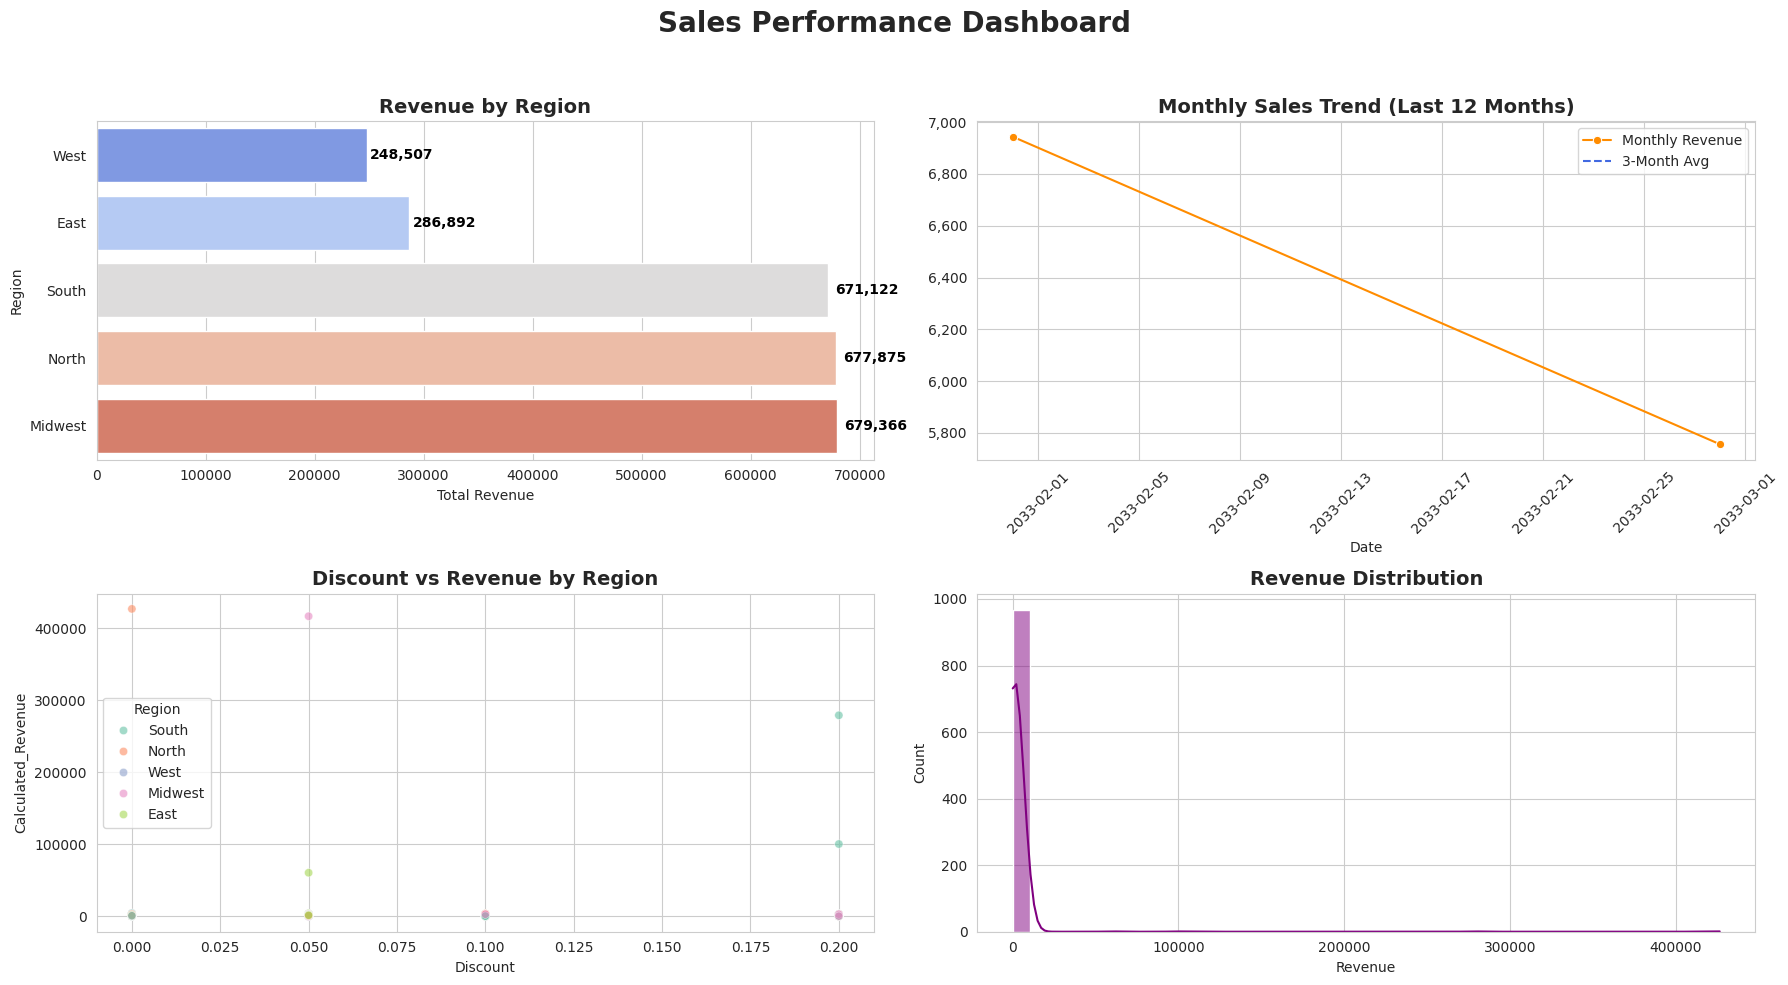

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle("Sales Performance Dashboard", fontsize=20, fontweight='bold')

# Revenue by Region
region_rev = full_data.groupby('Region')['Calculated_Revenue'].sum().sort_values()
sns.barplot(
    x=region_rev.values,
    y=region_rev.index,
    palette='coolwarm',
    ax=axes[0,0]
)
axes[0,0].set_title("Revenue by Region", fontsize=14, fontweight='bold')
axes[0,0].set_xlabel("Total Revenue")
axes[0,0].set_ylabel("Region")
for i, v in enumerate(region_rev.values):
    axes[0,0].text(v + 0.01*v.max(), i, f"{v:,.0f}", color='black', va='center',fontweight='bold')


#Monthly Trend
last_year_data = full_data[full_data['Date'] >= full_data['Date'].max() - pd.DateOffset(years=1)]
monthly_sales = last_year_data.set_index('Date').resample('ME')['Calculated_Revenue'].sum()
rolling_avg = monthly_sales.rolling(3).mean()

sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='darkorange', label='Monthly Revenue', ax=axes[0,1])
axes[0,1].plot(monthly_sales.index, rolling_avg, linestyle='--', color='royalblue', label='3-Month Avg')
axes[0,1].set_title("Monthly Sales Trend (Last 12 Months)", fontsize=14, fontweight='bold')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
axes[0,1].legend()

# Discount Impact
sns.scatterplot(
    data=full_data,
    x='Discount',
    y='Calculated_Revenue',
    hue='Region',
    palette='Set2',
    alpha=0.6,
    ax=axes[1,0]
)
axes[1,0].set_title("Discount vs Revenue by Region", fontsize=14, fontweight='bold')
axes[1,0].legend(title='Region')


# Revenue Distribution
sns.histplot(
    full_data['Calculated_Revenue'],
    bins=40,
    kde=True,
    color='purple',
    ax=axes[1,1]
)

axes[1,1].set_title("Revenue Distribution", fontsize=14, fontweight='bold')
axes[1,1].set_xlabel("Revenue")
axes[1,1].set_ylabel("Count")

plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

Product Dashboard

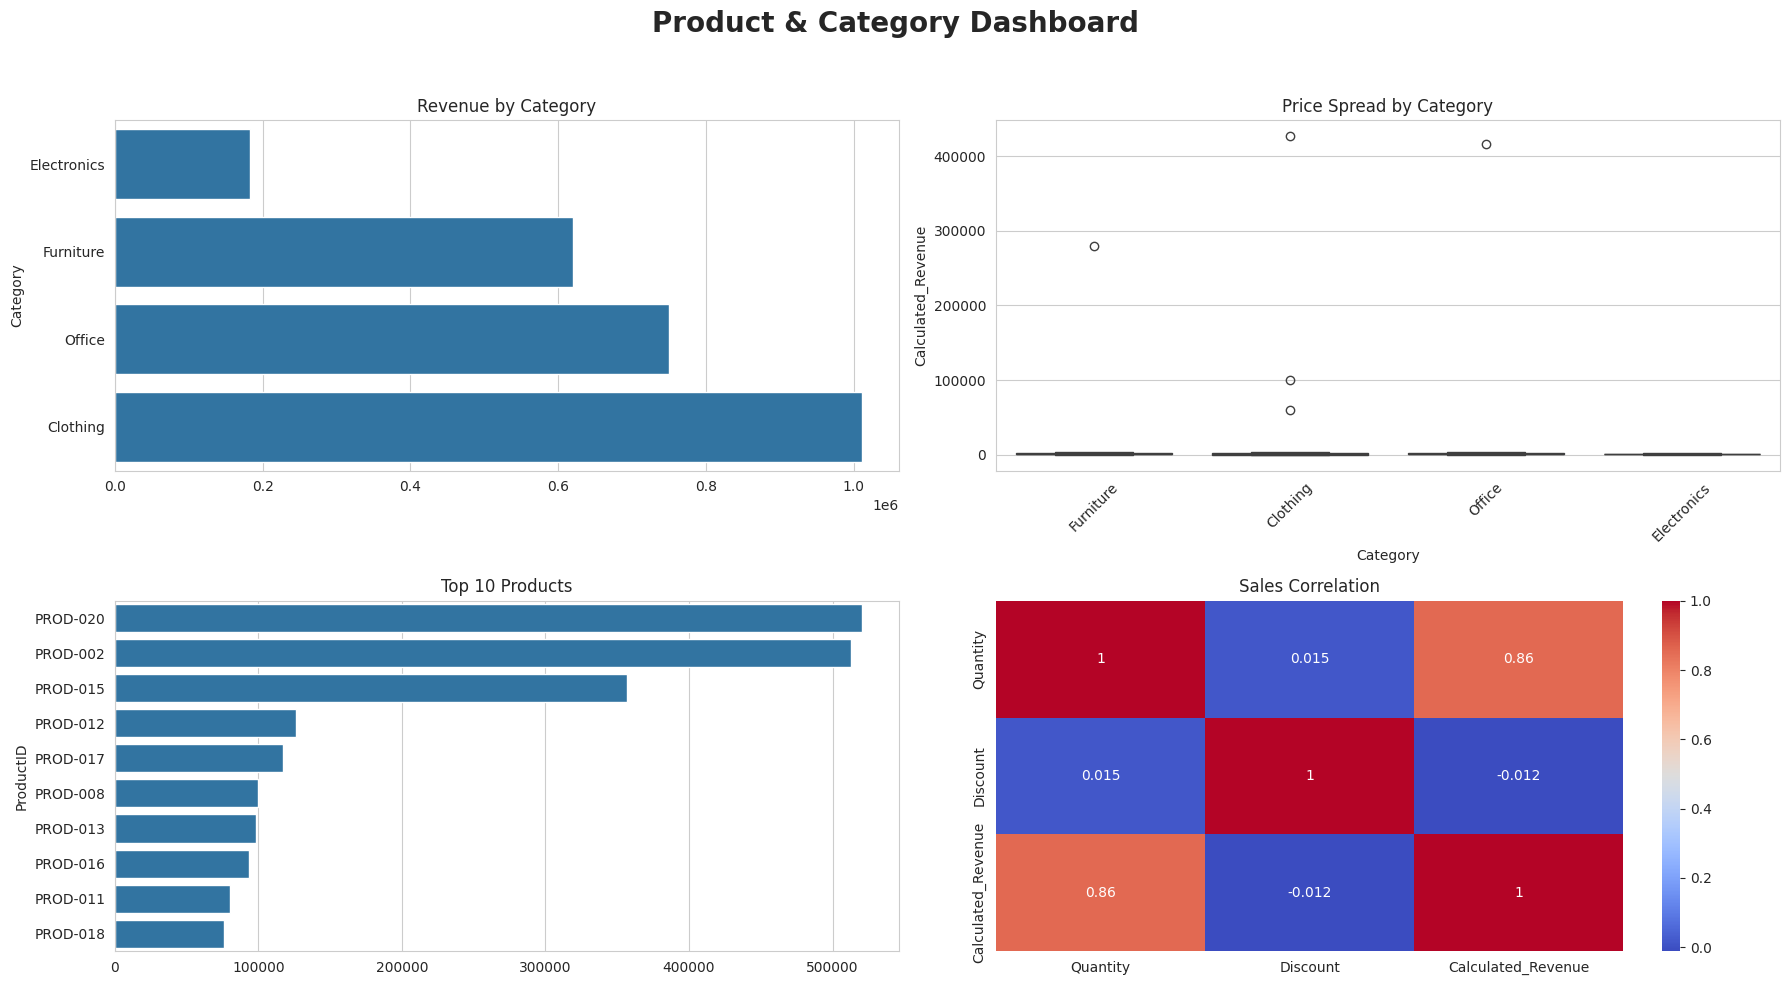

In [67]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle("Product & Category Dashboard", fontsize=20, fontweight='bold')

#Category Revenue

cat_rev = full_data.groupby('Category')['Calculated_Revenue'].sum().sort_values()

sns.barplot(
    x=cat_rev.values,
    y=cat_rev.index,
    ax=axes[0,0]
)

axes[0,0].set_title("Revenue by Category")

# Boxplot (REQUIRED)

sns.boxplot(
    data=full_data,
    x='Category',
    y='Calculated_Revenue',
    ax=axes[0,1]
)

axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].set_title("Price Spread by Category")


# Top Products

top_products = (
    full_data.groupby('ProductID')['Calculated_Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

sns.barplot(
    x=top_products.values,
    y=top_products.index,
    ax=axes[1,0]
)

axes[1,0].set_title("Top 10 Products")

# Correlation

corr = full_data[['Quantity','Discount','Calculated_Revenue']].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    ax=axes[1,1]
)

axes[1,1].set_title("Sales Correlation")

plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

Sales Dashboard

/tmp/ipython-input-2387255289.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, ax=axes[0,0], palette='Spectral')


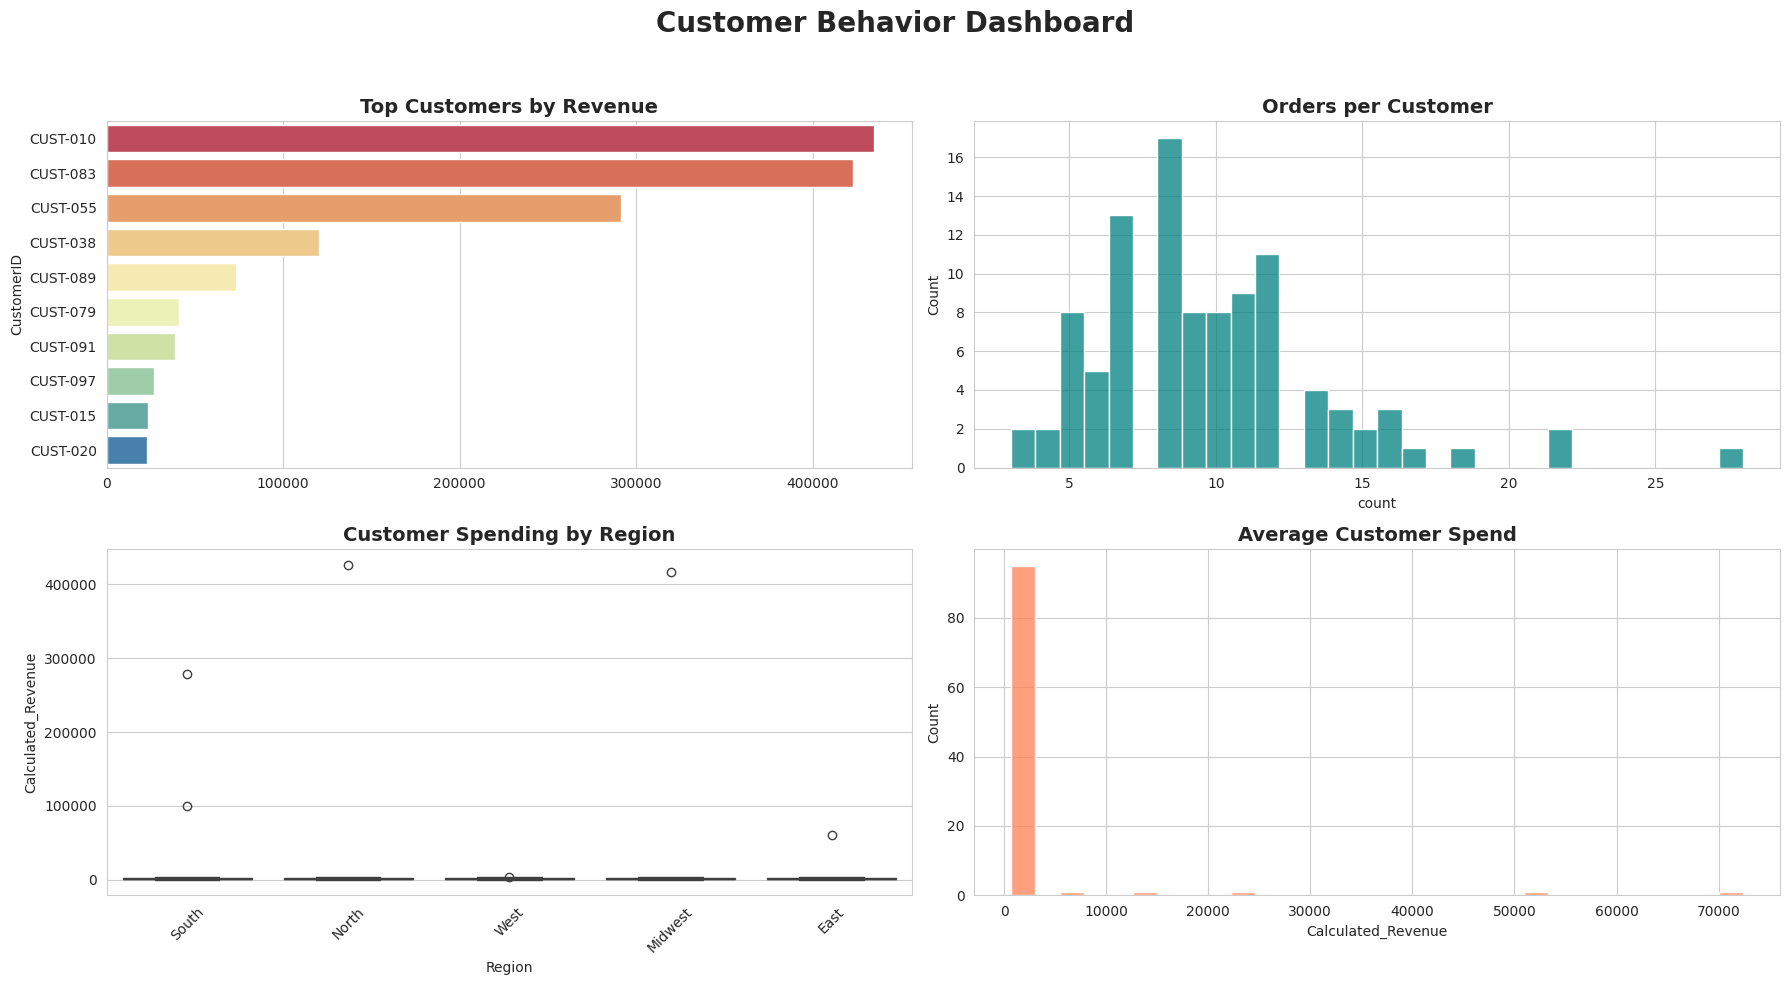

In [65]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle("Customer Behavior Dashboard", fontsize=20, fontweight='bold')

# Top Customers
top_customers = full_data.groupby('CustomerID')['Calculated_Revenue'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_customers.values, y=top_customers.index, ax=axes[0,0], palette='Spectral')
axes[0,0].set_title("Top Customers by Revenue", fontsize=14, fontweight='bold')

# Orders per Customer
orders = full_data['CustomerID'].value_counts()
sns.histplot(orders, bins=30, ax=axes[0,1], color='teal')
axes[0,1].set_title("Orders per Customer", fontsize=14, fontweight='bold')

# Customer Spending by Region
sns.boxplot(data=full_data, x='Region', y='Calculated_Revenue', ax=axes[1,0])
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].set_title("Customer Spending by Region", fontsize=14, fontweight='bold')

# Average Customer Spend
avg_spend = full_data.groupby('CustomerID')['Calculated_Revenue'].mean()
sns.histplot(avg_spend, bins=30, ax=axes[1,1], color='coral')
axes[1,1].set_title("Average Customer Spend", fontsize=14, fontweight='bold')

plt.tight_layout(rect=[0,0,1,0.95])
plt.show()
